In [34]:
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
#from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
# read the input file



In [35]:
from google.colab import files
files.upload()

Saving bank.csv to bank (1).csv


{'bank (1).csv': b'age,job,marital,education,contact,month,day_of_week,duration,y\r\n56,housemaid,married,basic.4y,telephone,may,mon,261,no\r\n57,services,married,high.school,telephone,may,mon,149,no\r\n37,services,married,high.school,telephone,may,mon,226,no\r\n40,admin.,married,basic.6y,telephone,may,mon,151,no\r\n56,services,married,high.school,telephone,may,mon,307,no\r\n45,services,married,basic.9y,telephone,may,mon,198,no\r\n59,admin.,married,professional.course,telephone,may,mon,139,no\r\n41,blue-collar,married,unknown,telephone,may,mon,217,no\r\n24,technician,single,professional.course,telephone,may,mon,380,no\r\n25,services,single,high.school,telephone,may,mon,50,no\r\n41,blue-collar,married,unknown,telephone,may,mon,55,no\r\n25,services,single,high.school,telephone,may,mon,222,no\r\n29,blue-collar,single,high.school,telephone,may,mon,137,no\r\n57,housemaid,divorced,basic.4y,telephone,may,mon,293,no\r\n35,blue-collar,married,basic.6y,telephone,may,mon,146,no\r\n54,retired,marr

In [36]:
bank = pd.read_csv("bank.csv")
bank.head(5)

,age,job,marital,education,contact,month,day_of_week,duration,y
0,56,housemaid,married,basic.4y,telephone,may,mon,261,no
1,57,services,married,high.school,telephone,may,mon,149,no
2,37,services,married,high.school,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,telephone,may,mon,151,no
4,56,services,married,high.school,telephone,may,mon,307,no


In [37]:
# print the columns
# --------------------------------------
col = list(bank.columns)
print(col)

['age', 'job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'duration', 'y']


In [38]:
# count of Rows and Columns
# -----------------------------
bank.shape

(41188, 9)

In [39]:
# total number of rows
# --------------------------------------
len(bank.index)


41188

In [40]:
# print the records for view
# --------------------------------------
bank.head()

,age,job,marital,education,contact,month,day_of_week,duration,y
0,56,housemaid,married,basic.4y,telephone,may,mon,261,no
1,57,services,married,high.school,telephone,may,mon,149,no
2,37,services,married,high.school,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,telephone,may,mon,151,no
4,56,services,married,high.school,telephone,may,mon,307,no


In [41]:
# describe the dataset (R,C)
# datatype = "object" indicates factor variables
# --------------------------------------
bank.dtypes

# need the Y-variable to be Numeric (0 and 1) for Logistic Regression
# steps:
# 1) create a new Y-variable and initialise with 0/1 appropriately
# 2) delete the old Y value
# -----------------------------------------------------------------
# 1)
# --
bank['purchase'] = 0
bank.purchase[bank.y == "yes"] = 1
bank.purchase[bank.y == "no"] = 0

# 2)
# --
bank = bank.drop(['y'],axis=1)

# check 1 and 2
# --------------
bank.columns
bank.head(50)
col = list(bank.columns)
print(col)


['age', 'job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'duration', 'purchase']


<ipython-input-41-a11791f98f01>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.purchase[bank.y == "yes"] = 1
<ipython-input-41-a11791f98f01>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.purchase[bank.y == "no"] = 0


In [42]:
# Get all the factor X-variables
# --------------------------------------
bank.dtypes

factor_x = bank.select_dtypes(exclude=["int64","float64","category"]).columns.values
print(factor_x)


['job' 'marital' 'education' 'contact' 'month' 'day_of_week']


In [43]:
# Unique values of all Factor variables
# --------------------------------------
for c in factor_x:
    print("Factor variable = '" + c + "'")
    print(bank[c].unique())
    print("***")

Factor variable = 'job'
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
***
Factor variable = 'marital'
['married' 'single' 'divorced' 'unknown']
***
Factor variable = 'education'
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
***
Factor variable = 'contact'
['telephone' 'cellular']
***
Factor variable = 'month'
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
***
Factor variable = 'day_of_week'
['mon' 'tue' 'wed' 'thu' 'fri']
***


In [44]:
# in education, group all the basic* values as BASIC
# update BANK, set education = 'BASIC'
# where education LIKE %'basic*y'%
# --------------------------------------
bank.education[
        (bank.education == 'basic.4y') |
        (bank.education == 'basic.6y') |
        (bank.education == 'basic.9y')
        ] = 'Basic'
print(bank.education.unique())

['Basic' 'high.school' 'professional.course' 'unknown' 'university.degree'
 'illiterate']


<ipython-input-44-f75daef92626>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.education[


In [45]:
bank.job[(bank.job == 'housemaid') |
        (bank.job == 'admin.') |
        (bank.job == 'blue-collar') |
        (bank.job == 'unknown')
        ] = 'Employed'

print(bank.purchase.unique())


[0 1]


<ipython-input-45-874dd82e558a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.job[(bank.job == 'housemaid') |


In [46]:
# check for NULLS, blanks and zeroes
# --------------------------------------
for c in col:
    if (len(bank[c][bank[c].isnull()])) > 0:
        print("WARNING: Column '{}' has NULL values".format(c))

    if (len(bank[c][bank[c] == 0])) > 0:
        print("WARNING: Column '{}' has value = 0".format(c))


<ipython-input-47-d8146f14917c>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='purchase', data=bank, palette='hls')


<Axes: xlabel='purchase', ylabel='count'>

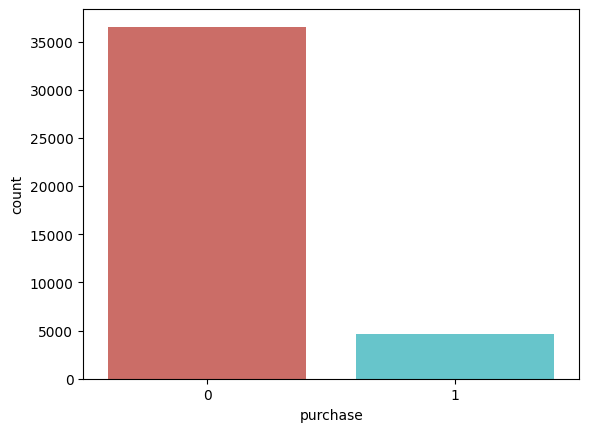

In [47]:
# convert all X-categorical variables
# ---------------------------------
for c in factor_x:
    bank[c] = bank[c].astype('category',copy=False)
bank.dtypes

# Exploratory Data Analysis
# -------------------------
# get the count of "YES" (1) and "NO" (0)
# --------------------------------------
bank['purchase'].value_counts()

# convert all X-categorical variables
# ---------------------------------
for c in factor_x:
    bank[c] = bank[c].astype('category',copy=False)
bank.dtypes

# plot the "Yes" and "No"
# --------------------------------------
# sns.countplot(x='y', data=bank, palette='hls')
sns.countplot(x='purchase', data=bank, palette='hls')

# get the average of numerical variables for
# each group "YES" and "NO"
# --------------------------------------

In [48]:
# Calculate the mean of only numerical columns
bank.select_dtypes(include=['number']).groupby('purchase').mean()

,age,duration
purchase,,
0,39.911185,220.844807
1,40.913147,553.191164


In [49]:
#bank.groupby('purchase').mean()
# interpretation: average age is higher of customers who purchased

Text(0, 0.5, 'Frequency of Purchase')

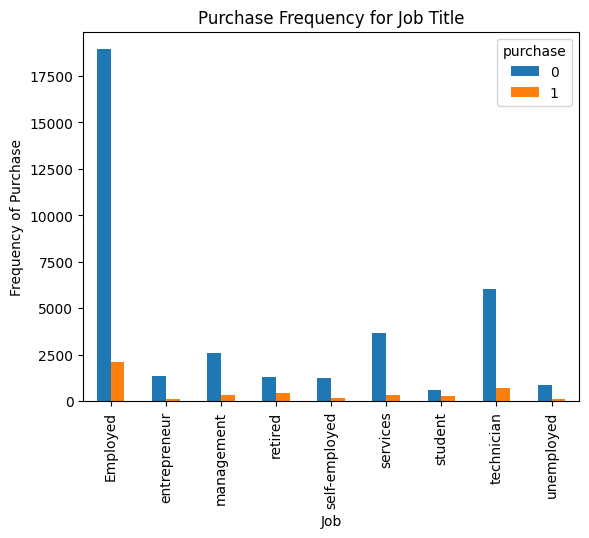

In [50]:
pd.crosstab(bank.job, bank.purchase).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

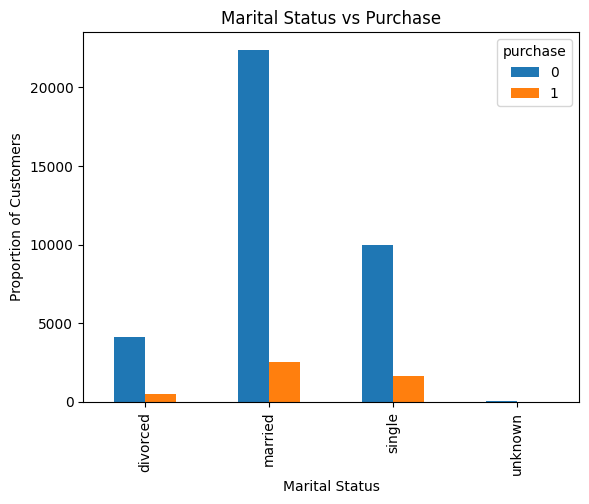

In [51]:
# Marital vs Purchase
# --------------------------------------
# chart
pd.crosstab(bank.marital,bank.purchase).plot(kind='bar')
plt.title('Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')


Text(0, 0.5, 'Proportion of Customers')

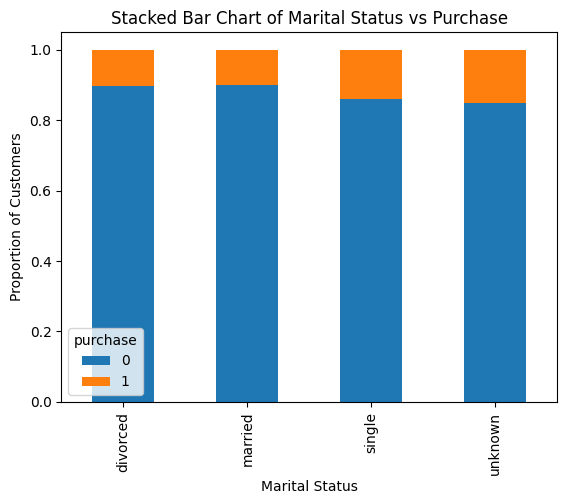

In [52]:
# proportion
# --------------------------------------
table=pd.crosstab(bank.marital, bank.purchase)
table.div(table.sum(1).astype(float),
          axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')


Text(0, 0.5, 'Proportion of Customers')

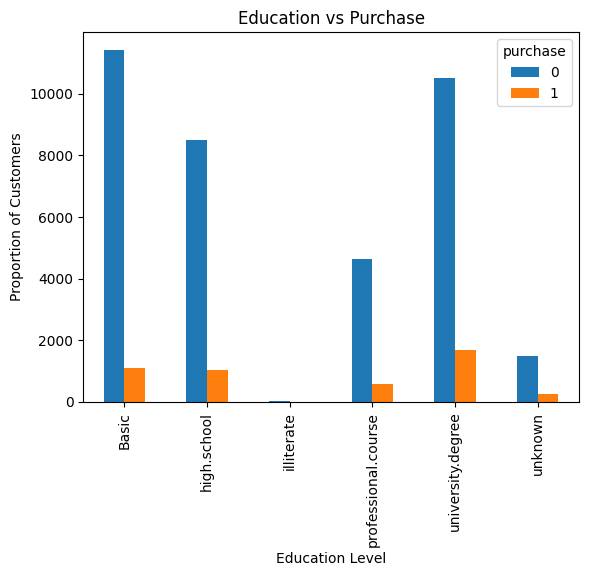

In [53]:
# Education vs Purchase
# chart
# --------------------------------------
pd.crosstab(bank.education,bank.purchase).plot(kind='bar')
plt.title('Education vs Purchase')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Proportion of Customers')

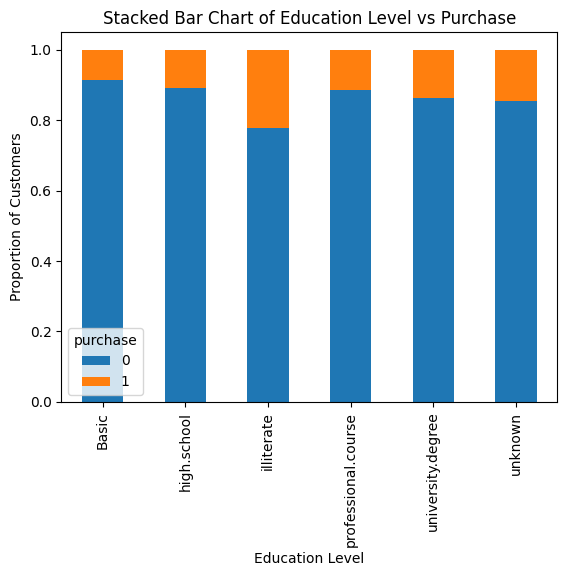

In [54]:
# proportion
table=pd.crosstab(bank.education, bank.purchase)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education Level vs Purchase')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Customers')

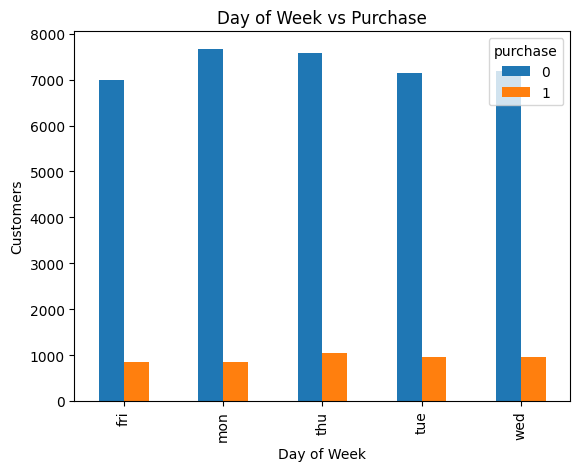

In [55]:
# Day of Week Vs Purchase
# --------------------------------------
pd.crosstab(bank.day_of_week,bank.purchase).plot(kind='bar')
plt.title('Day of Week vs Purchase')
plt.xlabel('Day of Week')
plt.ylabel('Customers')

In [56]:
# get the dummy coding for factor variables
# -----------------------------------------
bank.month.unique()
pd.get_dummies(bank.month,drop_first=True).tail(20)

bank.marital.unique()
pd.get_dummies(bank.marital,drop_first=True).tail(20)


,married,single,unknown
41168,True,False,False
41169,True,False,False
41170,False,False,False
41171,True,False,False
41172,False,True,False
41173,True,False,False
41174,True,False,False
41175,False,True,False
41176,False,False,False
41177,True,False,False


In [57]:
# create the dummy variables
# for every column having more than 1 value,
# create dummy variables
# this is done since there are characters in the factor variables
# ---------------------------------------------------------------
for var in factor_x:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(bank[var], prefix=var)
    data1=bank.join(cat_list)
    bank = data1

# old+dummy columns
bank.columns

bank.head()

bank_vars=bank.columns.values.tolist()
to_keep = [i for i in bank_vars if i not in factor_x]
print(to_keep)

# create the final dataset with the final columns set
# ---------------------------------------------------
bank_final = bank[to_keep]
bank_final.head(4)

['age', 'duration', 'purchase', 'job_Employed', 'job_entrepreneur', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_Basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']


,age,duration,purchase,job_Employed,job_entrepreneur,job_management,job_retired,job_self-employed,job_services,job_student,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,261,0,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,57,149,0,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
2,37,226,0,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,False,False,False
3,40,151,0,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [58]:
# reordering the columns
# ---------------------------------------------------
bank_final = pd.concat(
        [bank_final['purchase'],
        bank_final.drop('purchase',axis=1)],
        axis=1)

In [59]:
# split the dataset into train and test
# ---------------------------------------------------
train, test = train_test_split(bank_final, test_size = 0.3)

print(train.shape)
print(test.shape)


(28831, 39)
(12357, 39)


In [60]:
total_cols=len(bank_final.columns)
print(total_cols)


39


In [61]:
# split the train and test into X and Y variables
train_x = train.iloc[:,1:total_cols+1]
train_y = train.iloc[:,0]

test_x  = test.iloc[:,1:total_cols+1]
test_y = test.iloc[:,0]

In [62]:
# build the base model
# ---------------------

logreg = LogisticRegression(random_state=0)
logreg.fit(train_x, train_y)
pred_y = logreg.predict(test_x)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
# confusion matrix
# ----------------
y_actu = pd.Series(test_y, name='Actual')
y_pred = pd.Series(pred_y, name='Predicted')
y_actu = y_actu.astype('int64',copy=False)
y_pred = y_pred.astype('int64',copy=False)
df_confusion = pd.crosstab(y_actu, y_pred)
print(df_confusion)

cm1=confusion_matrix(test_y, pred_y)
print(cm1)


Predicted     0    1
Actual              
0          3404  179
1           118    6
[[10733   245]
 [  975   404]]


In [64]:
# Classification report : precision, recall, F-score
# ---------------------------------------------------
print(cr(test_y, pred_y))


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10978
           1       0.62      0.29      0.40      1379

    accuracy                           0.90     12357
   macro avg       0.77      0.64      0.67     12357
weighted avg       0.88      0.90      0.89     12357



In [65]:
# accuracy
# ---------
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(test_x, test_y)))


Accuracy of logistic regression classifier on test set: 0.90


In [66]:
# build the next model with the significant variables only
# =======================================================>

# RFE (recursive feature elimination)
# -----------------------------------
from sklearn.feature_selection import RFE # Import RFE
logreg = LogisticRegression()

# sklearn.feature_selection.RFE
# (estimator, n_features_to_select=None, step=1, verbose=0)
# get the best 18 features
rfe = RFE(logreg, n_features_to_select=18) # Use named argument for clarity
# rfe = rfe.fit(bank_final[X], bank_final[y] )
rfe=rfe.fit(bank_final.iloc[:,1:total_cols+1], bank_final.iloc[:,0])

support = rfe.support_
ranking = rfe.ranking_

final_cols = bank_final.columns.values
df_rfe = pd.DataFrame({"columns":final_cols[1:62],
                       "support":support,
                       "ranking":ranking})
df_rfe.sort_values("ranking")

# as per the RFE, the following columns are the best
# cols = df_rfe[['columns']][(df_rfe.support == True)]
cols = df_rfe['columns'][(df_rfe.support == True)].tolist()
print(cols)
type(cols)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

['job_entrepreneur', 'job_retired', 'job_services', 'job_student', 'job_technician', 'education_Basic', 'education_illiterate', 'contact_cellular', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon']


list

In [33]:
# build the next model with the significant variables only
# =======================================================>

# RFE (recursive feature elimination)
# -----------------------------------
logreg = LogisticRegression()

# sklearn.feature_selection.RFE
# (estimator, n_features_to_select=None, step=1, verbose=0)
# get the best 18 features
rfe = RFE(logreg, n_features_to_select=18) # Use named argument for clarity
# rfe = rfe.fit(bank_final[X], bank_final[y] )
rfe=rfe.fit(bank_final.iloc[:,1:total_cols+1], bank_final.iloc[:,0])


support = rfe.support_
ranking = rfe.ranking_

final_cols = bank_final.columns.values
df_rfe = pd.DataFrame({"columns":final_cols[1:62],
                       "support":support,
                       "ranking":ranking})
df_rfe.sort_values("ranking")

# as per the RFE, the following columns are the best
# cols = df_rfe[['columns']][(df_rfe.support == True)]
cols = df_rfe['columns'][(df_rfe.support == True)].tolist()
print(cols)
type(cols)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

['job_entrepreneur', 'job_retired', 'job_services', 'job_student', 'job_technician', 'education_Basic', 'education_illiterate', 'contact_cellular', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon']


list

In [67]:
# build the X and Y with the significant columns only
X=bank_final[cols] # train_x
y=bank_final['purchase'] # train_y
X.columns

# concat the 2 datasets with the signifcant columns only
# -----------------------------------------------------
bank2 = pd.concat([X,y], axis=1)
bank2.head()

,job_entrepreneur,job_retired,job_services,job_student,job_technician,education_Basic,education_illiterate,contact_cellular,contact_telephone,month_aug,month_dec,month_jul,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,purchase
0,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,0
1,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,0
2,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,0
3,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,0
4,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,0


In [68]:
# split the dataset into train and test
# ---------------------------------------------------
train2, test2 = train_test_split(bank2, test_size = 0.3)
print(train2.shape)
print(test2.shape)

(28831, 19)
(12357, 19)


In [69]:
# split the train and test into X and Y variables
train2_x = train2.iloc[:,1:18]
train2_y = train2.iloc[:,18]


In [70]:
test2_x = test2.iloc[:,1:18]
test2_y = test2.iloc[:,18]

In [71]:
# build the logistic regression model
logit_model = sm.Logit(train2_y, train2_x)
logit_result = logit_model.fit()
logit_result.summary2()

Optimization terminated successfully.
         Current function value: 0.315649
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Method:            MLE       
Dependent Variable:   purchase          Pseudo R-squared:  0.102     
Date:                 2024-07-02 05:48  AIC:               18234.9376
No. Observations:     28831             BIC:               18375.5142
Df Model:             16                Log-Likelihood:    -9100.5   
Df Residuals:         28814             LL-Null:           -10135.   
Converged:            1.0000            LLR p-value:       0.0000    
No. Iterations:       7.0000            Scale:             1.0000    
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
job_retired           0.7219   0.0775   9.3101 0.0000  0.5699  0.8738
job_services         -0.1931   0.0754  -2.5616 0.0104 -0.3408 -0.0453
job_student           0.8333   0.0994   8.3807 0.0000  0.6384  1.0282
job_technician       -0.0683   0.0557  -1.2263 0.2201 -0.1776  0.0409
education_Basic      -0.3074   0.0476  -6.4561 0.0000 -0.4008 -0.2141
education_illiterate  1.1598   0.6075   1.9092 0.0562 -0.0309  2.3504
contact_cellular     -1.1899   0.0507 -23.4724 0.0000 -1.2892 -1.0905
contact_telephone    -2.3260   0.0570 -40.7842 0.0000 -2.4378 -2.2142
month_aug            -0.7793   0.0664 -11.7366 0.0000 -0.9095 -0.6492
month_dec             1.3309   0.1863   7.1434 0.0000  0.9658  1.6961
month_jul            -0.9175   0.0668 -13.7347 0.0000 -1.0484 -0.7866
month_mar             1.3091   0.1138  11.5077 0.0000  1.0861  1.5321
month_may            -0.7810   0.0581 -13.4414 0.0000 -0.8949 -0.6671
month_nov            -0.8382   0.0764 -10.9688 0.0000 -0.9879 -0.6884
month_oct             1.0591   0.1031  10.2721 0.0000  0.8570  1.2611
month_sep             0.9109   0.1162   7.8406 0.0000  0.6832  1.1386
day_of_week_mon      -0.2716   0.0506  -5.3680 0.0000 -0.3708 -0.1724
=====================================================================

"""

In [72]:
# predict on the test set
# ---------------------------------------------------
pred_y2 = logit_result.predict(test2_x)
y2_results = list(pred_y2)
length = len(y2_results)


for i in range(0,length):
    if y2_results[i] <= 0.5:
        y2_results[i] = 0
    else:
        y2_results[i] = 1

cf = confusion_matrix(y2_results, test2_y)
print(cf)

[[10859  1276]
 [   99   123]]


In [73]:
# Classification report : precision, recall, F-score
# ---------------------------------------------------
#print(cf(test2_y, y_pdct))

from sklearn import metrics
import matplotlib.pyplot as pl

fpr, tpr, threshold = metrics.roc_curve(test2_y, y2_results)
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

0.5394427237352156


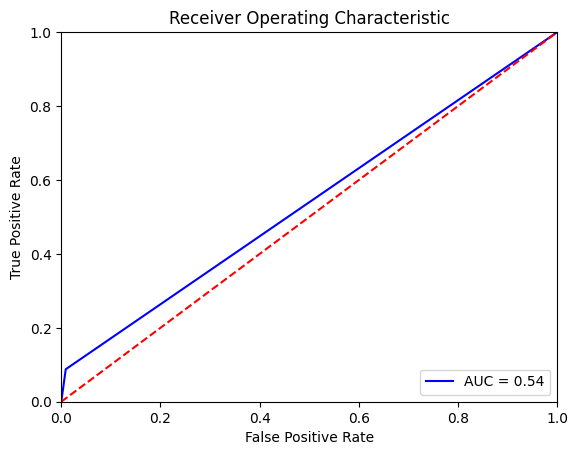

In [74]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()